In [153]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Here, in this approach, the control API (Control Primer) is being utilised. 

In [154]:
# Form and declare the universe variables:

#1. Speed
speed = np.arange(0, 101, 1)

#2. Distance
distance = np.arange (0,61,1)

#3. Brake Force
brake_Force = np.arange (0,101,1)

# NB: ctrl.Antecedent and ctrl.Consequent allows the (input) Antecedent 
# and Consequent (output) variables - for control - to be 
# obtained and utilised.

speed = ctrl.Antecedent(speed, 'speed')
distance = ctrl.Antecedent(distance, 'distance')
brake_Force = ctrl.Consequent(brake_Force,'brake_Force')


In [155]:
# Fuzzy Membership Functions are created and initialised over here:

# These functions are determined on linguistic scenarios that are based upon: 
# 1. How fast the vehicle is going? 

# 2. What is the distance e.g. between the vehicles (useful for braking)?

# 3. What is the amount of force required for a safe and successful brake?

# NB: Here the function trapf is implemented for every membership function; 
# this is useful as this allows computational fuzzy membership function values to be 
# returned via the usage of this trapezoidal function. (Used in MATLAB also.)

# Speed - Fuzzy Membership Function:

# <-------Evaluation Experimentation 1: Triangular Membership function ---------->
# speed['very_fast'] = fuzz.trimf(speed.universe, [67, 100, 100])
# speed['fast'] = fuzz.trimf(speed.universe, [34, 67, 100])
# speed['very_slow'] = fuzz.trimf(speed.universe, [0, 0, 34])
# speed['slow'] = fuzz.trimf(speed.universe, [0, 34, 67])

# <-------Evaluation Experimentation 2: Speed Membership Function values modified ---------->
# speed['very_fast']= fuzz.trapmf(speed.universe, [85, 100, 100, 100])
# speed['fast'] = fuzz.trapmf(speed.universe, [55, 70, 85, 100])
# speed['very_slow']= fuzz.trapmf(speed.universe, [0, 0, 25, 40])
# speed['slow'] = fuzz.trapmf(speed.universe, [25, 40, 55, 70])

speed['very_fast'] = fuzz.trapmf(speed.universe, [70, 85, 100,100])
speed['fast'] = fuzz.trapmf(speed.universe, [45, 55, 70, 80])
speed['very_slow'] = fuzz.trapmf(speed.universe, [0, 0, 15, 30])
speed['slow'] = fuzz.trapmf(speed.universe, [20, 30, 45, 55])

# NB: For the next two membership functions - the function trimf is implemented; 
# this is useful as this allows computational fuzzy membership function values to be 
# returned via the usage of this triangular function. (Used in MATLAB also.)

# Distance - Fuzzy Membership Function:

# <-------Evaluation Experimentation 2: Distance Membership Function values modified ---------->
# distance['very_far'] = fuzz.trimf(distance.universe, [45, 60, 60])
# distance['far'] = fuzz.trimf(distance.universe, [30, 45, 60])
# distance['very_close'] = fuzz.trimf(distance.universe, [0, 0, 15])
# distance['close'] = fuzz.trimf(distance.universe, [0, 15, 30])

distance['very_far'] = fuzz.trimf(distance.universe, [35, 45, 55])
distance['far'] = fuzz.trimf(distance.universe, [20, 30, 40])
distance['very_close'] = fuzz.trimf(distance.universe, [0, 0, 10])
distance['close'] = fuzz.trimf(distance.universe, [5, 15, 25])

# Brake Force - Fuzzy Membership Function:
#brake_Force['very_heavy'] = fuzz.trimf(brake_Force.universe, [67, 80, 100])
#brake_Force['heavy'] = fuzz.trimf(brake_Force.universe, [40, 50, 59])
#brake_Force['very_light'] = fuzz.trimf(brake_Force.universe, [0, 10, 19])
#brake_Force['light'] = fuzz.trimf(brake_Force.universe, [20, 30, 39])

brake_Force['very_heavy'] = fuzz.trimf(brake_Force.universe, [60, 80, 100])
brake_Force['heavy'] = fuzz.trimf(brake_Force.universe, [40, 60, 80])
brake_Force['very_light'] = fuzz.trimf(brake_Force.universe, [0, 20, 40])
brake_Force['light'] = fuzz.trimf(brake_Force.universe, [20, 40, 60])


/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


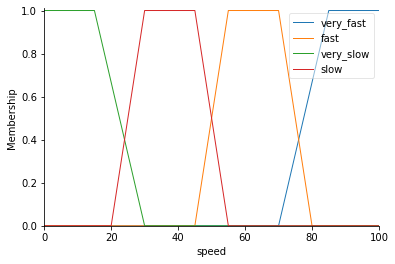

In [156]:
speed.view()

/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


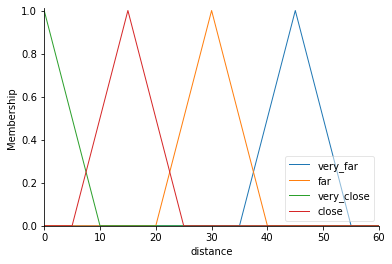

In [157]:
distance.view()

/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


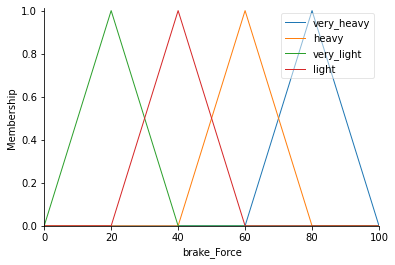

In [158]:
brake_Force.view()

Essential Braking Force Required:  80.00000000000004
Essential Braking Force Required:  60.0
Essential Braking Force Required:  39.99999999999999
Essential Braking Force Required:  20.0


/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/adilanwar/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


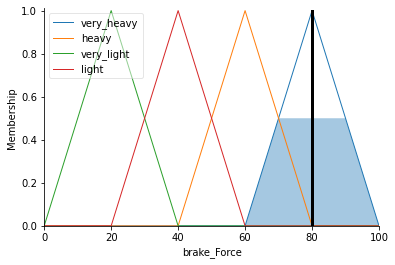

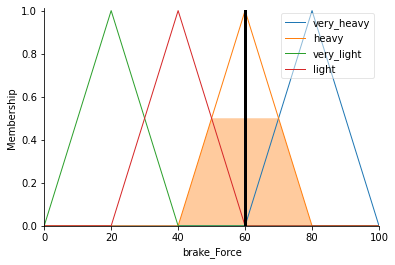

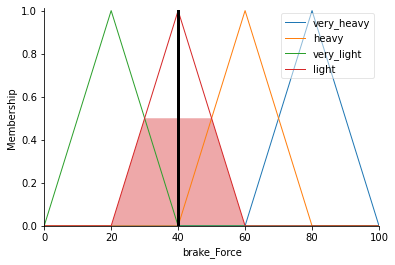

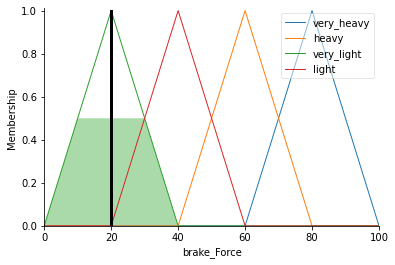

In [159]:
# Now we formulate the Fuzzy Rules: 16 Scenarios 

#<--------Each Fuzzy Rule is unique---------->

# Here the 4 rules that are grouped together are dependent on the vehicle:

# - Distance being close, speed being very fast and the force of the brakes that will be applied will be very heavy.
# - Distance being close, speed being fast and the force of the brakes that will be applied will be heavy.
# - Distance being close, speed being very slow and the force of the brakes that will be applied will be very light.
# - Distance being close, speed being slow and the force of the brakes that will be applied will be light.

fuzzyRule1 = ctrl.Rule(distance['close'] & speed['very_fast'] , brake_Force['very_heavy'])
fuzzyRule5 = ctrl.Rule(distance['close'] & speed['fast'] , brake_Force['heavy'])
fuzzyRule9 = ctrl.Rule(distance['close'] & speed['very_slow'] , brake_Force['very_light'])
fuzzyRule13 = ctrl.Rule(distance['close'] & speed['slow'] , brake_Force['light'])

# Here the 4 rules that are grouped together are dependent on the vehicle:

# - Distance being far, speed being very fast and the force of the brakes that will be applied will be very heavy.
# - Distance being far, speed being fast and the force of the brakes that will be applied will be heavy.
# - Distance being far, speed being very slow and the force of the brakes that will be applied will be very light.
# - Distance being far, speed being slow and the force of the brakes that will be applied will be light.

fuzzyRule2 = ctrl.Rule(distance['far'] & speed['very_fast'] , brake_Force['very_heavy'])
fuzzyRule6 = ctrl.Rule(distance['far'] & speed['fast'] , brake_Force['heavy'])
fuzzyRule10 = ctrl.Rule(distance['far'] & speed['very_slow'] , brake_Force['very_light']) 
fuzzyRule14 = ctrl.Rule(distance['far'] & speed['slow'] , brake_Force['light'])

# Here the 4 rules that are grouped together are dependent on the vehicle:

# - Distance being very far, speed being very fast and the force of the brakes that will be applied will be light.
# - Distance being very far, speed being fast and the force of the brakes that will be applied will be light.
# - Distance being very far, speed being very slow and the force of the brakes that will be applied will be very light.
# - Distance being very far, speed being slow and the force of the brakes that will be applied will be very light.

fuzzyRule3 = ctrl.Rule(distance['very_far'] & speed['very_fast'] , brake_Force['light'])
fuzzyRule7 = ctrl.Rule(distance['very_far'] & speed['fast'] , brake_Force['light'])
fuzzyRule11 = ctrl.Rule(distance['very_far'] & speed['very_slow'] , brake_Force['very_light'])
fuzzyRule15 = ctrl.Rule(distance['very_far'] & speed['slow'] , brake_Force['very_light'])

# Here the 4 rules that are grouped together are dependent on the vehicle:

# - Distance being very close, speed being very fast and the force of the brakes that will be applied will be very heavy.
# - Distance being very close, speed being fast and the force of the brakes that will be applied will be heavy.
# - Distance being very close, speed being very slow and the force of the brakes that will be applied will be very light.
# - Distance being very close, speed being slow and the force of the brakes that will be applied will be light.

fuzzyRule4 = ctrl.Rule(distance['very_close'] & speed['very_fast'] , brake_Force['very_heavy'])
fuzzyRule8 = ctrl.Rule(distance['very_close'] & speed['fast'] , brake_Force['heavy'])
fuzzyRule12 = ctrl.Rule(distance['very_close'] & speed['very_slow'] , brake_Force['very_light'])
fuzzyRule16 = ctrl.Rule(distance['very_close'] & speed['slow'] , brake_Force['light'])

controllingBrakes = ctrl.ControlSystem([fuzzyRule1,fuzzyRule2,fuzzyRule3,fuzzyRule4,
                                       fuzzyRule5,fuzzyRule6,fuzzyRule7,fuzzyRule8,
                                       fuzzyRule9,fuzzyRule10,fuzzyRule11,fuzzyRule12,
                                       fuzzyRule13,fuzzyRule14,fuzzyRule15,fuzzyRule16])

executionOfBrakes = ctrl.ControlSystemSimulation(controllingBrakes)

# Here are 4 examples with the respective graphical implementations shown below - 
# that show the all four braking intensities - the application of the fuzzy rules is evidently seen here.
# All these graphical representations depend on is range of the values inputted and the overlapping ranges 
# between the brake force intensities:

executionOfBrakes.input['distance'] = 10
executionOfBrakes.input['speed'] = 100
executionOfBrakes.compute()
print ("Essential Braking Force Required: ", executionOfBrakes.output['brake_Force'])
brake_Force.view(sim=executionOfBrakes)

executionOfBrakes.input['distance'] = 25
executionOfBrakes.input['speed'] = 60
executionOfBrakes.compute()
print ("Essential Braking Force Required: ", executionOfBrakes.output['brake_Force'])
brake_Force.view(sim=executionOfBrakes)

executionOfBrakes.input['distance'] = 50
executionOfBrakes.input['speed'] = 100
executionOfBrakes.compute()
print ("Essential Braking Force Required: ", executionOfBrakes.output['brake_Force'])
brake_Force.view(sim=executionOfBrakes)

executionOfBrakes.input['distance'] = 5
executionOfBrakes.input['speed'] = 10
executionOfBrakes.compute()
print ("Essential Braking Force Required: ", executionOfBrakes.output['brake_Force'])
brake_Force.view(sim=executionOfBrakes)


In [ ]:
while (True==True): 
    inputDriving_Distance = float(input("Distance to drive: "))
    inputDriving_Speed = float(input("Speed of driving: "))
    
    if (inputDriving_Distance < inputDriving_Speed):
        executionOfBrakes.input['speed'] = inputDriving_Speed
        executionOfBrakes.input['distance'] = inputDriving_Distance
        executionOfBrakes.compute()
        print (executionOfBrakes.output['brake_Force'], "%: is the Essential Braking Force Required. ")
        #brake_Force.view(sim=executionOfBrakes)
        if(inputDriving_Distance < inputDriving_Speed/2):
            print ("As the driving distance is less than half of the driving speed then,",executionOfBrakes.output['brake_Force'], "%: is the Essential Braking Force Required. ")
    elif (inputDriving_Distance > inputDriving_Speed):
        print ("0% is the required braking force; braking is not necessary; you may continue to travel.")
        #brake_Force.view(sim=executionOfBrakes)
        if(inputDriving_Distance > inputDriving_Speed/2):
            print ("As the driving distance is greater than half of the driving speed then 0%: is the Essential Braking Force Required. ")
    elif (inputDriving_Distance == inputDriving_Speed):
        print ("0% is the required braking force; braking is not necessary; you may continue to travel.")
        #brake_Force.view(sim=executionOfBrakes)
    else: 
        print ("0% is the required braking force; braking is not necessary; you may continue to travel.")
        #brake_Force.view(sim=executionOfBrakes)

Distance to drive: 10
Speed of driving: 100
80.00000000000004 %: is the Essential Braking Force Required. 
As the driving distance is less than half of the driving speed then, 80.00000000000004 %: is the Essential Braking Force Required. 
Distance to drive: 25
Speed of driving: 60
60.0 %: is the Essential Braking Force Required. 
As the driving distance is less than half of the driving speed then, 60.0 %: is the Essential Braking Force Required. 
Distance to drive: 50
Speed of driving: 100
39.99999999999999 %: is the Essential Braking Force Required. 
Distance to drive: 5
Speed of driving: 10
20.0 %: is the Essential Braking Force Required. 
